In [231]:
import os 
import glob 
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt 
from ipywidgets import interact, fixed 


# View Atlas or Subject Image 

In [232]:
def sagittal_view(x, img): 
    plt.figure()
    plt.imshow(img[x,:,:], cmap='gray')
    plt.show()

def horizontal_view(y, img): 
    plt.figure()
    plt.imshow(img[:,y,:], cmap='gray')
    plt.show()

def coronal_view(z, img): 
    plt.figure()
    plt.imshow(img[:,:,z], cmap='gray')
    plt.show()

In [234]:
# load image 
img_dir = '/Users/apple/Desktop/3DCNN_hardparameter_sharing_example/sample/MNI152_T1_1mm_Brain.nii.gz'
img = nib.load(img_dir)
img = np.array(img.dataobj)
# get the length of x, y, and z axis
x, y, z = img.shape
# view image 
interact(sagittal_view, x=(0,x-1), img=fixed(img))
interact(horizontal_view, y=(0,y-1), img=fixed(img))
interact(coronal_view, z=(0,z-1), img=fixed(img))


interactive(children=(IntSlider(value=90, description='x', max=181), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=108, description='y', max=217), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=90, description='z', max=181), Output()), _dom_classes=('widget-interact…

<function __main__.coronal_view(z, img)>

# Overlay Atlas Image and Subject XAI Map
  
XAI maps are obtained from models trained with augmented original image (i.e., resize).  
Thus, resizing original image is necessary.

In [235]:
def sagittal_view(x, img, xai, low_threshold, high_threshold): 
    plt.figure()
    plt.imshow(img[x,:,:], cmap='gray')
    plt.imshow(xai[x,:,:], cmap='Reds', vmin=low_threshold, vmax=high_threshold, alpha=0.6)
    plt.colorbar()
    plt.show()

def horizontal_view(y, img, xai, low_threshold, high_threshold): 
    plt.figure()
    plt.imshow(img[:,y,:], cmap='gray')
    plt.imshow(xai[:,y,:], cmap='Reds', vmin=low_threshold, vmax=high_threshold, alpha=0.6)
    plt.colorbar()
    plt.show()

def coronal_view(z, img, xai, low_threshold, high_threshold): 
    plt.figure()
    plt.imshow(img[:,:,z], cmap='gray')
    plt.imshow(xai[:,:,z], cmap='Reds', vmin=low_threshold, vmax=high_threshold, alpha=0.6)
    plt.colorbar()
    plt.show()

## Visualize XAI map with min-max scaling

In [236]:
# load image 
img_dir = '/Users/apple/Desktop/CNN_for_BMI/template_img/T1/MNI_6th_generation/MNI152_T1_1mm_Brain.nii.gz'
img = nib.load(img_dir)
img = np.array(img.dataobj)
# load XAI map 
xai_dir = '/Users/apple/Desktop/CNN_for_BMI/paper/experiments/XAI/become_overweight/1year/partition0/NDARINV02RCED7D.npy'
xai = np.load(xai_dir)

# resizing image
from monai.transforms import AddChannel, Compose, Resize
img_size = (128, 128, 128)
transform = Compose([AddChannel(), Resize(img_size)])
img = np.squeeze(transform(img))
xai = np.squeeze(transform(xai)) 
# min-max scaling XAI map for visualization
xai = (xai - np.min(xai)) / (np.max(xai) - np.min(xai))

# view image 
interact(sagittal_view, x=(0,img_size[0]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()))
interact(horizontal_view, y=(0,img_size[1]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()))
interact(coronal_view, z=(0,img_size[2]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()))


interactive(children=(IntSlider(value=63, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='y', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.coronal_view(z, img, xai, low_threshold, high_threshold)>

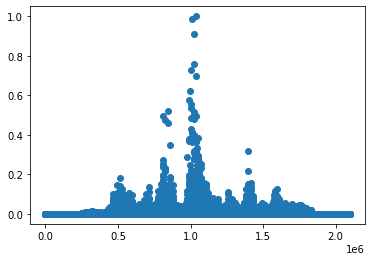

In [86]:
# check the distribution of attribution values of XAI map
plt.scatter(x=[i for i in range(len(xai.flatten()))], y=xai.flatten())

In [104]:
# thresholding and visualize again
interact(sagittal_view, x=(0,img_size[0]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()/10))
interact(horizontal_view, y=(0,img_size[1]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()/10))
interact(coronal_view, z=(0,img_size[2]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()/10))


interactive(children=(IntSlider(value=63, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='y', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.coronal_view(z, img, xai, low_threshold, high_threshold)>

## Visualize XAI map with standard scaling

In [110]:
# load image 
img_dir = '/Users/apple/Desktop/CNN_for_BMI/template_img/T1/MNI_6th_generation/MNI152_T1_1mm_Brain.nii.gz'
img = nib.load(img_dir)
img = np.array(img.dataobj)
# load XAI map 
xai_dir = '/Users/apple/Desktop/CNN_for_BMI/paper/experiments/XAI/become_overweight/1year/partition0/NDARINV02RCED7D.npy'
xai = np.load(xai_dir)

# resizing image
from monai.transforms import AddChannel, Compose, Resize
img_size = (128, 128, 128)
transform = Compose([AddChannel(), Resize(img_size)])
img = np.squeeze(transform(img))
# standard scaling XAI map for visualization
xai = (xai - np.mean(xai)) / np.std(xai)

# view image 
interact(sagittal_view, x=(0,img_size[0]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()))
interact(horizontal_view, y=(0,img_size[1]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()))
interact(coronal_view, z=(0,img_size[2]-1), img=fixed(img), xai=fixed(xai), low_threshold=fixed(xai.min()), high_threshold=fixed(xai.max()))


interactive(children=(IntSlider(value=63, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='y', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.coronal_view(z, img, xai, low_threshold, high_threshold)>

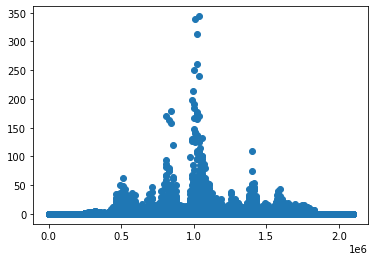

In [112]:
# check the distribution of attribution values of XAI map
plt.scatter(x=[i for i in range(len(xai.flatten()))], y=xai.flatten())

In [126]:
# thresholding and visualize again
xai_threshold = xai.mean() + 2*xai.std() 
xai_filtered = np.where(xai >= xai_threshold, 1, 0)
interact(sagittal_view, x=(0,img_size[0]-1), img=fixed(img), xai=fixed(xai_filtered), low_threshold=fixed(0), high_threshold=fixed(1))
interact(horizontal_view, y=(0,img_size[1]-1), img=fixed(img), xai=fixed(xai_filtered), low_threshold=fixed(0), high_threshold=fixed(1))
interact(coronal_view, z=(0,img_size[2]-1), img=fixed(img), xai=fixed(xai_filtered), low_threshold=fixed(0), high_threshold=fixed(1))


interactive(children=(IntSlider(value=63, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='y', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.coronal_view(z, img, xai, low_threshold, high_threshold)>

# Overlay Atlas Image and Group XAI Map
  
XAI maps are obtained from models trained with augmented original image (i.e., resize).  
Thus, resizing original image is necessary.

In [117]:
def make_mean_xai(xai_files): 
    mean_xai = []
    # load each subjects XAI map and concatenate
    for xai in xai_files: 
        xai = np.load(xai)
        xai = (xai - xai.mean()) / xai.std()    # subject-level standard scaling 
        xai = np.expand_dims(xai, axis=0)
        mean_xai.append(xai)
    mean_xai = np.concatenate(mean_xai, axis=0)
    # getting group-wise mean value per each voxels
    mean_xai = np.mean(mean_xai, axis=0, keepdims=True)
    return np.squeeze(mean_xai, axis=0)

In [119]:
## Visualize XAI map with standard scaling
# load image 
img_dir = '/Users/apple/Desktop/CNN_for_BMI/template_img/T1/MNI_6th_generation/MNI152_T1_1mm_Brain.nii.gz'
img = nib.load(img_dir)
img = np.array(img.dataobj)
# load XAI map 
xai_dir = '/Users/apple/Desktop/CNN_for_BMI/paper/experiments/XAI/become_overweight/1year/partition0'

xai_files = glob.glob(os.path.join(xai_dir, '*'))
mean_xai = make_mean_xai(xai_files=xai_files)

# resizing image
from monai.transforms import AddChannel, Compose, Resize
img_size = (128, 128, 128)
transform = Compose([AddChannel(), Resize(img_size)])
img = np.squeeze(transform(img))



In [120]:
# view image 
interact(sagittal_view, x=(0,img_size[0]-1), img=fixed(img), xai=fixed(mean_xai), low_threshold=fixed(mean_xai.min()), high_threshold=fixed(mean_xai.max()))
interact(horizontal_view, y=(0,img_size[1]-1), img=fixed(img), xai=fixed(mean_xai), low_threshold=fixed(mean_xai.min()), high_threshold=fixed(mean_xai.max()))
interact(coronal_view, z=(0,img_size[2]-1), img=fixed(img), xai=fixed(mean_xai), low_threshold=fixed(mean_xai.min()), high_threshold=fixed(mean_xai.max()))

interactive(children=(IntSlider(value=63, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='y', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.coronal_view(z, img, xai, low_threshold, high_threshold)>

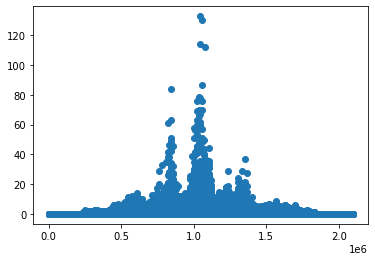

In [122]:
# check the distribution of attribution values of XAI map
plt.scatter(x=[i for i in range(len(mean_xai.flatten()))], y=mean_xai.flatten())


In [125]:
# thresholding and visualize again
mean_xai_threshold = mean_xai.mean() + 2*mean_xai.std() 
mean_xai_filtered = np.where(mean_xai >= mean_xai_threshold, 1, 0)
interact(sagittal_view, x=(0,img_size[0]-1), img=fixed(img), xai=fixed(mean_xai_filtered), low_threshold=fixed(0), high_threshold=fixed(1))
interact(horizontal_view, y=(0,img_size[1]-1), img=fixed(img), xai=fixed(mean_xai_filtered), low_threshold=fixed(0), high_threshold=fixed(1))
interact(coronal_view, z=(0,img_size[2]-1), img=fixed(img), xai=fixed(mean_xai_filtered), low_threshold=fixed(0), high_threshold=fixed(1))

interactive(children=(IntSlider(value=63, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='y', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.coronal_view(z, img, xai, low_threshold, high_threshold)>